In [67]:
import skimage
%matplotlib inline
from skimage import io
from skimage import data

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import median_filter
from scipy.ndimage.filters import gaussian_filter

In [68]:
def mse(img1, img2):
    error = np.sum((img1.astype("float") - img2.astype("float")) ** 2)
    error /= float(img1.shape[0] * img1.shape[1] * 3) #divide by x * y * 3 (3 for rgb images)

    return error

In [69]:
def psnr(img1, img2):
    img_psnr = 20 * math.log10(255) - 10 * math.log10( mse(img1, img2)) #MAX possible pixel value = 255 (8 bit represenation)
    
    return img_psnr

In [88]:
img = data.camera() # cameraman image

psnr_values = list()
sigma_values = list()
for i in range(1,51):
    filtered_i = gaussian_filter(img, sigma=i) # filtered cameraman image with sigma 1-50;
                                               # sigma 0 returns the original image -> MSE = 0
                                               # this means PSNR = infinite/not defined (10*log(255/0))
    sigma_values.append(i)
    psnr_i = psnr(img, filtered_i)
    psnr_values.append(psnr_i)

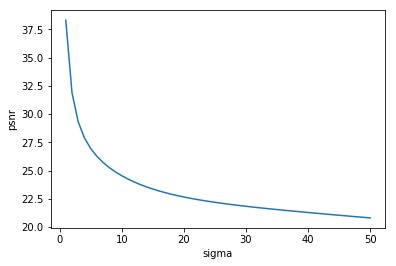

In [90]:
plt.ylabel('psnr')
plt.xlabel('sigma')
plt.plot(sigma_values, psnr_values)